Import Analytical and Visualization Libraries

In [371]:
import numpy as np
import pandas as pd

In [372]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [373]:
df = pd.read_csv('Classified Data', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [374]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [375]:
scaler.fit(df.drop('TARGET CLASS', axis=1))
scaler.mean_

array([0.94968151, 1.11430254, 0.8341269 , 0.68209937, 1.03233633,
       0.94353434, 0.96342187, 1.0719605 , 1.15825079, 1.3627246 ])

In [376]:
scaler.var_

array([0.08380469, 0.06602674, 0.08491864, 0.0526841 , 0.05919062,
       0.06553216, 0.06502012, 0.08342688, 0.08619545, 0.04166615])

In [377]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [378]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [379]:
from sklearn.model_selection import train_test_split

In [380]:
X = df_feat
y = df['TARGET CLASS']

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [382]:
from sklearn.neighbors import KNeighborsClassifier

In [383]:
knn = KNeighborsClassifier(n_neighbors=1)

In [384]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [385]:
pred = knn.predict(X_test)

In [386]:
from sklearn.metrics import accuracy_score

In [387]:
acc = accuracy_score(y_test,pred)
print(f"Accuracy: {acc}")

Accuracy: 0.9233333333333333


In [388]:
from sklearn.metrics import classification_report, confusion_matrix

In [389]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[151   8]
 [ 15 126]]


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [390]:
error_rate = []
lower_bound = 1
upper_bound = 50

for i in range(lower_bound,upper_bound):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # Mean of when pred != actual value = error rate
    error = np.mean(pred_i != y_test)
    error_rate.append(error)

Text(0, 0.5, 'Error Rate')

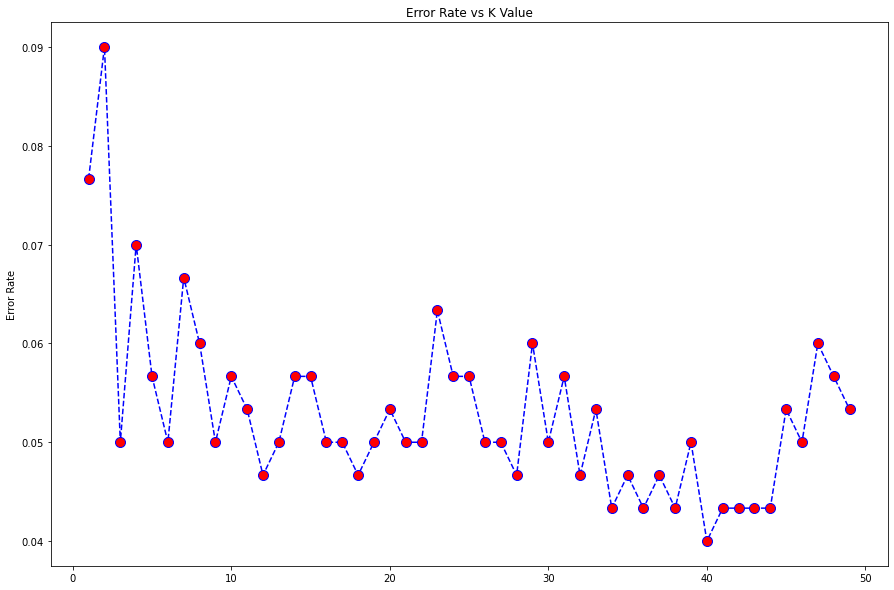

In [391]:
plt.figure(figsize=(15,10))
plt.plot(range(lower_bound,upper_bound), error_rate, color='blue', linestyle = 'dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.ylabel('Error Rate')

In [392]:
knn1 = KNeighborsClassifier(n_neighbors=17)
knn1.fit(X_train, y_train)
pred1 = knn.predict(X_test)
acc1 = accuracy_score(y_test,pred1)

In [393]:
print('n_neighbors=1')
print(f"Accuracy: {acc}")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('\n')
print('\n')
print('n_neighbors=17')
print(f"Accuracy: {acc1}")
print(confusion_matrix(y_test, pred1))
print(classification_report(y_test, pred1))

n_neighbors=1
Accuracy: 0.9233333333333333
[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300





n_neighbors=17
Accuracy: 0.9466666666666667
[[149  10]
 [  6 135]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       159
           1       0.93      0.96      0.94       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

